In [37]:
from sklearn import datasets, linear_model, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.load_wine()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
print(dataset["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

# Understand Data

In [21]:
df_x = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df_y = pd.DataFrame(dataset['target'], columns=['target'])
df = pd.concat([df_x, df_y], axis=1)

<Axes: >

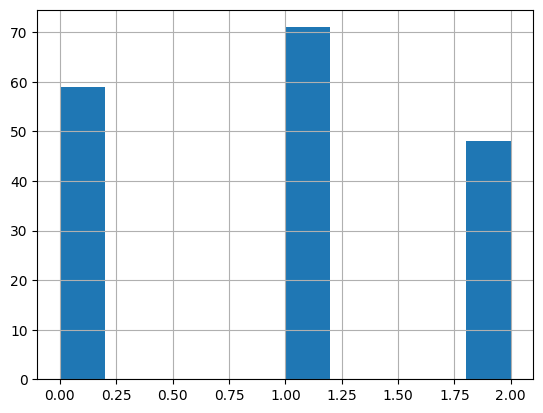

In [22]:
df['target'].hist()

In [23]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


# Binary classification

In [53]:
model = make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(penalty='l2')
)

In [54]:
y = (df["target"] == 1)*1
x = df_x

<Axes: >

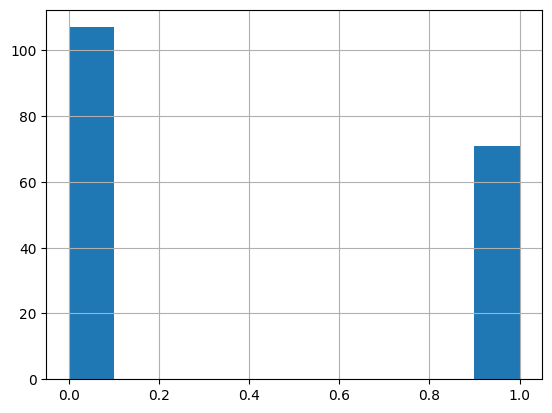

In [55]:
pd.Series(y).hist()

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x.values,y.values, stratify=y, random_state=123, test_size=0.3)

<Axes: >

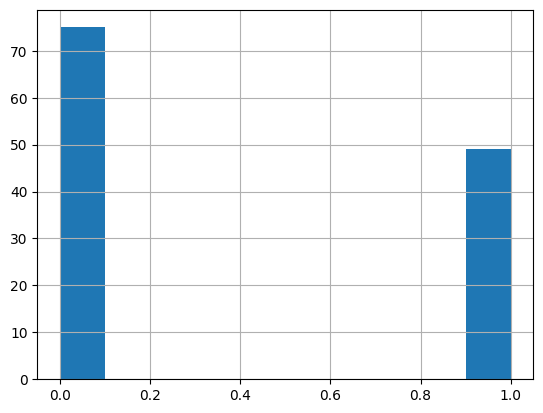

In [57]:
pd.Series(y_train).hist()

In [58]:
model.fit(x_train, y_train)
result = model.predict(x_test)

In [59]:
correct = result == y_test
print(round(correct.sum()/len(correct),2))

0.98


# Multi-class classification

In [60]:
x = dataset['data']
y = dataset['target']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=123, test_size=0.3)

In [63]:
model = make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(penalty='l2')
)
model.fit(x_train, y_train)
result = model.predict(x_test)

In [65]:
result

array([0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 0,
       1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2,
       0, 1, 1, 1, 0, 2, 0, 1, 1, 2])

In [66]:
model.predict_proba(x_test)

array([[9.97952613e-01, 1.29740000e-03, 7.49987174e-04],
       [9.88214862e-01, 1.12287403e-02, 5.56397337e-04],
       [9.99467527e-01, 2.11100181e-04, 3.21372511e-04],
       [3.23454936e-02, 9.56234121e-01, 1.14203857e-02],
       [9.91342578e-01, 6.67401232e-03, 1.98340971e-03],
       [9.90935143e-01, 6.45452825e-03, 2.61032899e-03],
       [9.89203972e-01, 1.06531672e-02, 1.42861117e-04],
       [2.19835128e-03, 9.97670869e-01, 1.30779631e-04],
       [5.35047263e-03, 7.66157894e-02, 9.18033738e-01],
       [2.17405912e-03, 9.97746777e-01, 7.91641041e-05],
       [1.05259468e-02, 9.89105125e-01, 3.68928244e-04],
       [4.95868193e-04, 9.99186818e-01, 3.17314293e-04],
       [8.90866947e-03, 5.66498739e-02, 9.34441457e-01],
       [3.23857551e-02, 6.28706042e-01, 3.38908203e-01],
       [7.70457246e-03, 4.04305270e-02, 9.51864901e-01],
       [7.19518456e-03, 3.57134893e-02, 9.57091326e-01],
       [1.11271042e-03, 4.24922004e-02, 9.56395089e-01],
       [7.90050604e-01, 1.85903

In [69]:
print(f"Model coeficients: {model[-1].coef_}")
print(f"Model intercept: {model[-1].intercept_}")

Model coeficients: [[ 0.83989115  0.21564312  0.43783045 -0.65112953  0.03074448  0.28634571
   0.4945522  -0.37064814  0.12635269  0.21527837  0.10913585  0.66375834
   0.89429371]
 [-0.89302484 -0.30346005 -0.81441614  0.46421417 -0.15349504 -0.02397911
   0.48018177  0.35352276  0.17263874 -0.99655056  0.6916392  -0.01376441
  -0.93416546]
 [ 0.05313369  0.08781692  0.37658568  0.18691536  0.12275055 -0.2623666
  -0.97473397  0.01712538 -0.29899143  0.78127219 -0.80077504 -0.64999392
   0.03987175]]
Model intercept: [ 0.26944136  0.67589869 -0.94534005]
